In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'illness/national_illness.csv', index_col=0)

In [4]:
etth1.head()

,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
date,,,,,,,
2002-01-01 00:00:00,1.22262,1.16668,582,805,2060,754,176569
2002-01-08 00:00:00,1.33344,1.21650,683,872,2267,785,186355
2002-01-15 00:00:00,1.31929,1.13057,642,878,2176,831,192469
2002-01-22 00:00:00,1.49484,1.25246,728,1045,2599,863,207512
2002-01-29 00:00:00,1.47195,1.30237,823,1189,2907,909,223208


In [5]:
etth1.shape

(966, 7)

<Axes: xlabel='date'>

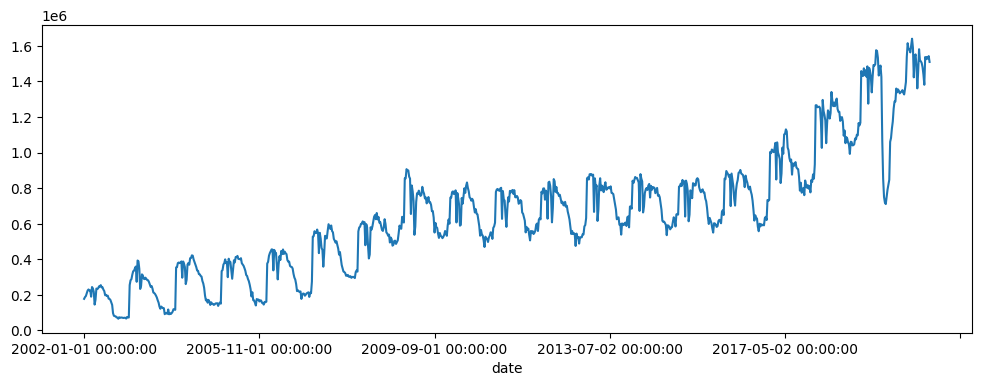

In [6]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [7]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

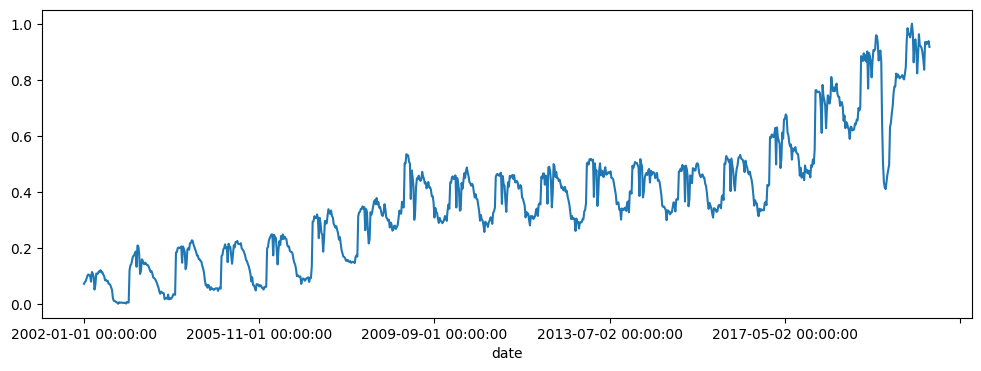

In [8]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [9]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1782597822
Epoch 2, Boundaries delta: 0.0718293689, Codewords delta: 0.0557263148
Epoch 3, Boundaries delta: 0.0503496083, Codewords delta: 0.0404375921
Epoch 4, Boundaries delta: 0.0369824433, Codewords delta: 0.0294336390
Epoch 5, Boundaries delta: 0.0264896457, Codewords delta: 0.0224707450
Epoch 6, Boundaries delta: 0.0198684534, Codewords delta: 0.0176888060
Epoch 7, Boundaries delta: 0.0155527010, Codewords delta: 0.0140251026
Epoch 8, Boundaries delta: 0.0124788527, Codewords delta: 0.0110926131
Epoch 9, Boundaries delta: 0.0103096807, Codewords delta: 0.0091256385
Epoch 10, Boundaries delta: 0.0087819742, Codewords delta: 0.0077312902
Epoch 11, Boundaries delta: 0.0076478207, Codewords delta: 0.0066745751
Epoch 12, Boundaries delta: 0.0067659840, Codewords delta: 0.0059462644
Epoch 13, Boundaries delta: 0.0060896825, Codewords delta: 0.0054757287
Epoch 14, Boundaries delta: 0.0055706215, Codewords delta: 0.0051093152
E

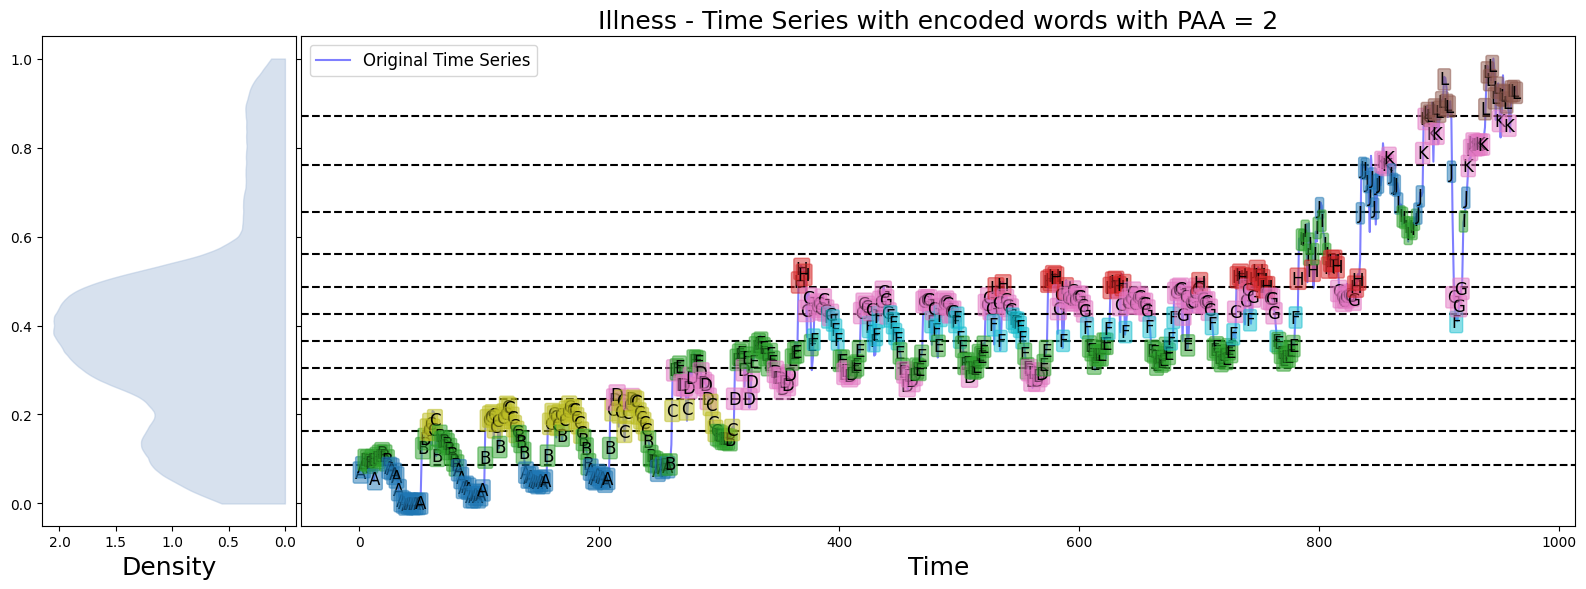

In [10]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=2)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="illness/ETTh1_ksax.png", data_name='Illness')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"illness/illness_ksax.csv")

### Stationary

In [13]:
target = scaled_etth1
target = target.diff().dropna()

In [14]:
target.head()

date
2002-01-08 00:00:00    0.006210
2002-01-15 00:00:00    0.003880
2002-01-22 00:00:00    0.009546
2002-01-29 00:00:00    0.009960
2002-02-05 00:00:00    0.003963
dtype: float64

Epoch 1, Boundaries delta: 0.0840083992, Codewords delta: 0.0841341360
Epoch 2, Boundaries delta: 0.0323410041, Codewords delta: 0.0187634405
Epoch 3, Boundaries delta: 0.0179509779, Codewords delta: 0.0128506631
Epoch 4, Boundaries delta: 0.0120461337, Codewords delta: 0.0097012632
Epoch 5, Boundaries delta: 0.0087825034, Codewords delta: 0.0075669595
Epoch 6, Boundaries delta: 0.0066665019, Codewords delta: 0.0060377283
Epoch 7, Boundaries delta: 0.0052158016, Codewords delta: 0.0049221827
Epoch 8, Boundaries delta: 0.0042296736, Codewords delta: 0.0040953649
Epoch 9, Boundaries delta: 0.0035784712, Codewords delta: 0.0035036686
Epoch 10, Boundaries delta: 0.0030904493, Codewords delta: 0.0031835215
Epoch 11, Boundaries delta: 0.0028457057, Codewords delta: 0.0029205924
Epoch 12, Boundaries delta: 0.0026374118, Codewords delta: 0.0026846482
Epoch 13, Boundaries delta: 0.0024493292, Codewords delta: 0.0024652920
Epoch 14, Boundaries delta: 0.0022740388, Codewords delta: 0.0022628095
E

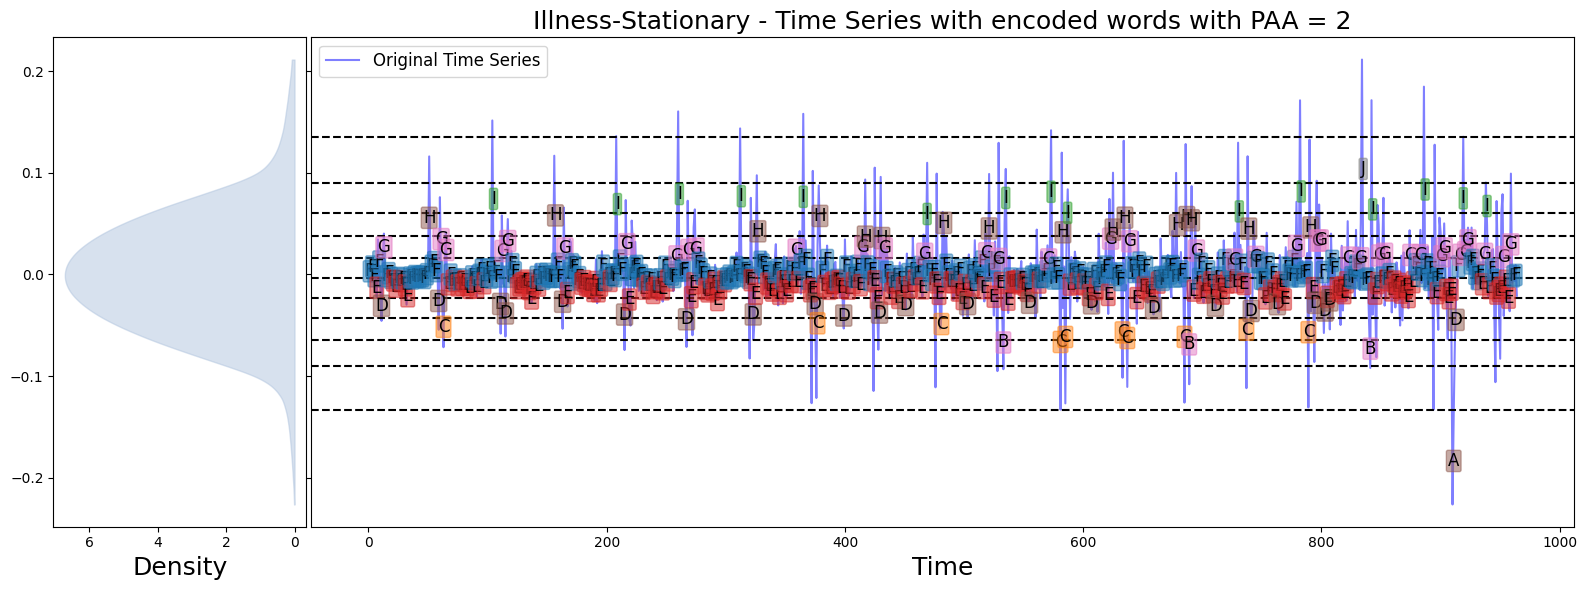

In [15]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=2)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="illness/illness_stationary_ksax.png", data_name='Illness-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"illness/illness_stationary_ksax.csv")